In [1]:
import pandas as pd 
import numpy as np
import math
from utlis import *


tmp = pd.read_csv('Weed_Resistance_Data.csv', sep = ',', header=None)
params_in = list(tmp[:21][0])


params_in = np.array(params_in)

In [2]:
General_TillingFrequency = np.loadtxt('Corteva/BMP_Matlab_Code/Tilling_Data.txt')
Herbicide_data = np.loadtxt('Corteva/BMP_Matlab_Code/Herbicide_Data.txt')

starting year and cohort are:  25  &  1
total fish caught:  1
total fish caught:  2
total fish caught:  3
total fish caught:  4
total fish caught:  5
total fish caught:  6
total fish caught:  7
total fish caught:  8
total fish caught:  9
total fish caught:  10
total fish caught:  11
total fish caught:  12
total fish caught:  13
total fish caught:  14
total fish caught:  15
total fish caught:  16
total fish caught:  17
total fish caught:  18
total fish caught:  19
total fish caught:  20
total fish caught:  21
total fish caught:  22
total fish caught:  23
total fish caught:  24
total fish caught:  25
total fish caught:  26
total fish caught:  27
total fish caught:  28
total fish caught:  29
total fish caught:  30
total fish caught:  31
total fish caught:  32
total fish caught:  33
total fish caught:  34
total fish caught:  35
total fish caught:  36
total fish caught:  37
total fish caught:  38
total fish caught:  39
total fish caught:  40
total fish caught:  41
total fish caught:  42
tot

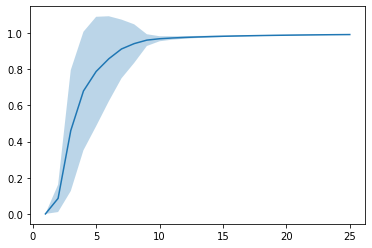

In [3]:
from utlis import PrepareParams
import numpy as np 

a = 1
Params = PrepareParams()

nYears = int(Params.General.nYears)
nCohorts = int(Params.General.nCohorts)

# nYears = 25
# nCohorts = 2
print("starting year and cohort are: ", nYears, " & ", nCohorts)
'''MAIN SIMULATION

Run simulation of nCohorts and nYears, storing information at each step in
the simulation NOTE: (1 x nGeno) variables called curPop (for current
population) and curBank (for current seed bank) will be used to store the
population in the current loop

Each stage in the life cycle is given its own section, denoted by %% and a
horizontal line if editing in Matlab. The format of the code for each
life-cycle stage is:
A. Get parameters relevant for the current stage 
B. Call transition function for the current stage
C. Adjust populations if needed (e.g. extinction)
D. Store current population in population structure array'''

H1_eff = [.27,.03,.02]
H2_eff = [0,0,0]
H3_eff = [0,0,0]
H4_eff = [0,0,0]

strategies = []

for i in range(1000):
    Population.seedBank = np.zeros((nYears,nGeno,nCohorts))

    # %Lower seed bank density
    Population.lowerBank = np.zeros((nYears,nGeno))

    # %immigrant seed
    Population.immSeed = np.zeros((nYears,nGeno,nCohorts))

    # %emigrant seed
    Population.emSeed = np.zeros((nYears,nGeno,nCohorts))

    # %germination storage
    Population.germination = np.zeros((nYears,nGeno,nCohorts))

    # %ungerminated storage
    Population.ungerminated = np.zeros((nYears,nGeno,nCohorts))


    Population.herbicide1 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide2 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide3 = np.zeros((nYears,nGeno,nCohorts))
    Population.herbicide4 = np.zeros((nYears,nGeno,nCohorts))
    Population.seedProd = np.zeros((nYears,nGeno,nCohorts))

    Population.mature = np.zeros((nYears,nGeno,nCohorts))


    Population.hand = np.zeros((nYears,nGeno,nCohorts))


    Population.immPol = np.zeros((nYears,nGeno,nCohorts))


    Population.emPol = np.zeros((nYears,nGeno,nCohorts))


    Population.newSeed = np.zeros((nYears,nGeno,nCohorts))


    Population.mutated = np.zeros((nYears,nGeno,nCohorts))


    Population.predation = np.zeros((nYears,nGeno,nCohorts))


    Population.winter = np.zeros((nYears,nGeno))


    Population.Res = np.zeros((1, 3))

    '''Final initialization steps

    Put the SeedBank array from the initialization functions into the
    population.seedBank array for year 1, all genotypes, and cohort 1'''

    Population.seedBank[0,:,0] = Params.General.UpperSeedBank
    Population.lowerBank[0,:] = Params.General.LowerSeedBank

    for y in range(nYears):
        tempSeedBank = np.zeros(81)

        '''If it till frequency = current year, upper and lower seed banks
        will be swapped, otherwise, nothing changes'''
    #
        Population.seedBank[y,:,0],Population.lowerBank[y,:] = deepTill(Population.seedBank[y,:,0],
                                                                    Population.lowerBank[y,:],
                                                                    Params.General.TillingFreq,y)
        
        
        for c in range(nCohorts):
            # print(" y : ", y, " c", c)
            
            ImmSeed = seedImmigration(nGeno)
            seedBank = Population.seedBank[y,:,c]+ ImmSeed
            seedBank = extinction(seedBank,fieldSize)
            fGerm = Params.Germination.survivalFraction[y,c]
            germination = survival(seedBank,fGerm)
            ungerminated = seedBank - germination
            germination = extinction(germination,fieldSize)
            fCult = Params.Cultivation.survivalFraction[y,c]
            cult = survival(germination,fCult)
            cult = extinction(cult,fieldSize)

            # fSS = 1 - Params.Herbicide1.efficacy_SS[0,0]
            # fRS = 1 - Params.Herbicide1.efficacy_RS[0,0]
            # fRR = 1 - Params.Herbicide1.efficacy_RR[0,0]

            fSS = 1 - H1_eff[0]
            fRS = 1 - H1_eff[1]
            fRR = 1 - H1_eff[2]

            targetLocus = Params.Herbicide1.targetLocus

            herbicide1_ = selectiveSurvival(cult,[fSS,fRS,fRR],targetLocus,Params.key)

            herbicide1 = extinction(herbicide1_,fieldSize)

            # fSS = 1 - Params.Herbicide2.efficacy_SS[y,c]
            # fRS = 1 - Params.Herbicide2.efficacy_RS[y,c]
            # fRR = 1 - Params.Herbicide2.efficacy_RR[y,c]

            fSS = 1 - H2_eff[0]
            fRS = 1 - H2_eff[1]
            fRR = 1 - H2_eff[2]

            targetLocus = Params.Herbicide2.targetLocus

            herbicide2_ = selectiveSurvival(herbicide1,[fSS,fRS,fRR],targetLocus,Params.key)
                    
            herbicide2 = extinction(herbicide2_,fieldSize)

            fSS = 1 - H3_eff[0]
            fRS = 1 - H3_eff[1]
            fRR = 1 - H3_eff[2]

            targetLocus = Params.Herbicide3.targetLocus

            herbicide3_ = selectiveSurvival(herbicide2,[fSS,fRS,fRR],targetLocus,Params.key)
            herbicide3 = extinction(herbicide3_,fieldSize)

            fSS = 1 - H4_eff[0]
            fRS = 1 - H4_eff[1]
            fRR = 1 - H4_eff[2]

            targetLocus = Params.Herbicide4.targetLocus

            herbicide4_ = selectiveSurvival(herbicide3,[fSS,fRS,fRR],targetLocus,Params.key)
            herbicide4 = extinction(herbicide4_,fieldSize)

            A = Params.Mature.maxplants[y,c]
            B = Params.Mature.cropParam[y,c]
            C = Params.Mature.weedCompetition[y,c]

            mature_ = competition(herbicide4,A,B,C)
            mature = extinction(mature_,fieldSize)
            fHand = Params.Hand.survivalFraction[y,c]

            hand = survival(mature,fHand)
            hand = extinction(hand,fieldSize)
            
            A = Params.SeedProd.maxyield[y,c]
            B = Params.SeedProd.cropParam[y,c]
            C = Params.SeedProd.weedCompetition[y,c]
            sum_hand = float(np.sum(hand))
            seedYield = competition(sum_hand,A,B,C)
            newFrac = mating(hand,Params.General.selfingCoeff, Params.key)
            seedProd_= newFrac*seedYield*Params.General.femaleFrac
            seedProd = extinction(seedProd_,fieldSize)

            targetLocus = 1
            muS2R = Params.Mutation.muS2R_locus1[y,c]
            muR2S = Params.Mutation.muR2S_locus1[y,c]
        
            if muS2R==0 and muR2S==0:
                mutated_locus1 = seedProd
            else:
                mutated_locus1 = mutation(seedProd,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus1 = extinction(mutated_locus1,fieldSize)

            targetLocus = 2
            muS2R = Params.Mutation.muS2R_locus2[y,c]
            muR2S = Params.Mutation.muR2S_locus2[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus2 = mutated_locus1
            else:
                mutated_locus2 = mutation(mutated_locus1,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus2 = extinction(mutated_locus2,fieldSize)

            targetLocus = 3
            muS2R = Params.Mutation.muS2R_locus3[y,c]
            muR2S = Params.Mutation.muR2S_locus3[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus3 = mutated_locus2
            else:
                mutated_locus3 = mutation(mutated_locus2,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus3 = extinction(mutated_locus3,fieldSize)

            targetLocus = 4
            muS2R = Params.Mutation.muS2R_locus4[y,c]
            muR2S = Params.Mutation.muR2S_locus4[y,c]

            if muS2R==0 and muR2S==0:
                mutated_locus4 = mutated_locus3
            else:
                mutated_locus4 = mutation(mutated_locus3,muS2R,muR2S,targetLocus,Params.key)
                mutated_locus4 = extinction(mutated_locus4,fieldSize)

            fPred = Params.Predation.survivalFraction[y,c]
            predation = survival(mutated_locus4,fPred)
            predation = extinction(predation,fieldSize)


            # print(predation) 
            if Params.General.seedDelay == 0:
                if c < nCohorts-1:
                    Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + predation + ungerminated
                else:
                    tempSeedBank = tempSeedBank + ungerminated + predation
            else:
                tempSeedBank = tempSeedBank + predation
                if c < nCohorts:

                    Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + ungerminated
                else:
                    tempSeedBank = tempSeedBank + ungerminated

            Population.immSeed[y,:,c] = ImmSeed
            Population.ungerminated[y,:,c] = ungerminated
            Population.germination[y,:,c] = germination
            Population.herbicide1[y,:,c] = herbicide1
            Population.herbicide2[y,:,c] = herbicide2
            # Population.herbicide3[y,:,c] = herbicide3
            # Population.herbicide4[y,:,c] = herbicide4
            Population.mature[y,:,c] = mature
            Population.hand[y,:,c] = hand
            Population.seedProd[y,:,c] = seedProd
            Population.predation[y,:,c] = predation
            

        if y != nYears-1:
            fWint_upper = Params.Winter.uppersurvivalFraction[y][c]
            fWint_lower = Params.Winter.lowersurvivalFraction[y][c]

            winter_ = survival(tempSeedBank,fWint_upper)
            winter = extinction(winter_,fieldSize)

            Population.winter[y,:] = winter
            Population.seedBank[y+1,:,0] = Population.seedBank[y+1,:,0] + winter
            Population.lowerBank[y+1,:] = survival(Population.lowerBank[y,:],fWint_lower)
            Population.lowerBank[y+1,:] = extinction(Population.lowerBank[y+1,:],fieldSize)

        else:

            break
        N = nYears*nCohorts

    newPop = np.zeros((N,nGeno))

    k = 0
    for y in range(nYears):
        for c in range(nCohorts):
            newPop[k,:] = Population.seedBank[y,:,c]
            k = k + 1


    Rpop = np.zeros(nYears*nCohorts,)
    for G in range(nGeno):
        for L in range(nLoci):
            if Params.key[L,G] == 2 or Params.key[L,G] == 1:
                Rpop =  Rpop + newPop[:,G]
                break
            
    pltPop = Rpop/np.sum(newPop, axis=1)
    # print(pltPop.shape)

    if sum(pltPop[-5:-1]) > .2:
        strategies.append(pltPop)
        print("total fish caught: ", a)
        a+=1


import seaborn as sns
import matplotlib.pyplot as plt


strategies = np.array(strategies)
strategy = np.mean(strategies, axis=0)
strategies = np.array(strategies)
strategy = np.mean(strategies, axis = 0)
dev = np.std(strategies, axis = 0)

lower = strategy - dev
upper = strategy + dev 



plt.fill_between([x+1 for x in range(len(strategy))], lower, upper, alpha=.3)
plt.plot([x+1 for x in range(len(strategy))], strategy)